In [1]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors
from sklearn import metrics
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt

In [2]:
filename = 'breast-cancer-wisconsin.data'
raw = np.genfromtxt(filename, delimiter=',')  

In [3]:

# NaN means missing data, need to fill it
mask = np.isnan(raw)
raw[mask]=0
mask_sum = np.sum(mask, axis = 0)
col_sum = np.sum(raw,axis=0)
for k in range(10):
    mask1d = mask[:,k]
    raw[mask1d,k] = col_sum[k] / (len(raw) - mask_sum[k])

In [4]:
# Sample features of all_X is 699 x 9
# We don't need ID (not a feature)
df_X = raw[:,1:10]
# Sample labels are in df_y. Shape of df_y is 599
df_y = raw[:,10]

In [5]:


#Split train and test dataset
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.3, stratify=df_y)

ix = (y_train==2) # class = 2 means benign
X_benign=X_train[ix,:]
neigh = NearestNeighbors(n_neighbors=5)
neigh.fit(X_benign)
# gmm 
gmm5 = GaussianMixture(n_components=5)
gmm5.fit(X_benign)


if (0):
    for thr in range(1,55):
        pred = []
        pred_gmm = []
        for test_vec in X_test:
            test_sp = np.reshape(test_vec,(1,-1))
            # knn
            dist,index=neigh.kneighbors(test_sp)
            print(dist,index)
            total_dist = np.sum(dist)
            if (total_dist < thr):
                pred.append(2)
            else:
                pred.append(4)
            
            s2 = gmm5.score_samples(test_sp)
            
            
        pred2 = np.array(pred)
        pred_gmm2 = np.array(pred_gmm)
        acc = np.sum(pred2 == y_test) / len(y_test)
        acc_gmm2 = np.sum(pred_gmm2 == y_test) / len(y_test)
        print('Acc knn = %.2f' % acc)
        print('Acc gmm = %.2f' % acc_gmm2)

[4.57440694]
[6.44050837]
[-2.93077667]
[6.44050837]
[-2.60966124]
[3.80898122]
[5.72706188]
[6.79900053]
[3.88709494]
[-5174.3641277]
[1.83487403]
[6.41170716]
[5.72706188]
[5.04278719]
[6.03347329]
[3.04471937]
[-386.17871882]
[5.21429486]
[5.61099332]
[-4.17527005]
[-18.61899788]
[-21150.44991796]
[-123.66474135]
[5.21429486]
[6.52794322]
[6.50097933]
[-3351.69386519]
[-1778.1398035]
[5.95496912]
[-60351.45377199]
[5.04416381]
[6.52794322]
[4.69529124]
[-109.64819915]
[-505.84648578]
[1.51086228]
[-137.32671943]
[-335.40923851]
[-7.03777661]
[4.27515815]
[-36715.75378224]
[-305.38273241]
[-22233.79707693]
[1.52742354]
[5.72706188]
[-101.71331268]
[3.33437317]
[7.13658659]
[5.72706188]
[-40.46159066]
[6.41170716]
[6.52794322]
[-16.65888644]
[7.04623346]
[3.88709494]
[1.64110362]
[2.98341637]
[5.99071989]
[-25026.78348339]
[-521.80209543]
[3.37682517]
[6.52794322]
[-258.61250225]
[1.30104246]
[6.44050837]
[-36.44663315]
[5.72706188]
[7.13658659]
[6.04137146]
[-6.70095631]
[6.18183669]

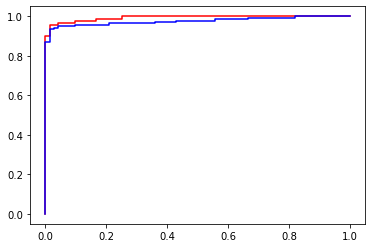

In [8]:
#This part is to compute ROC
pred_score = []
pred_gmm_score = []
for test_vec in X_test:
    test_sp = np.reshape(test_vec,(1,-1)) # reshpae cause sklearn needs 2-D array
    # knn
    dist,index=neigh.kneighbors(test_sp)
    total_dist = np.sum(dist)

    pred_score.append(total_dist)
    # gmm
    s2 =gmm5.score_samples(test_sp)
    print(s2)
    pred_gmm_score.append(s2)
    
# Convert distance to score. Higher score menas more likely to be in class 2    
#scores =  (np.max(pred_score) - pred_score) / np.max(pred_score)
scores =  (np.max(pred_score) - pred_score) # 類似正規化
# scores_gmm =  (np.max(pred_gmm_score) - pred_gmm_score)  # 本身是機率0~1之間

fpr, tpr, thresholds = metrics.roc_curve(y_test, scores, pos_label=2)
plt.plot(fpr, tpr, color='red')

fpr_gmm, tpr_gmm, thresholds = metrics.roc_curve(y_test, pred_gmm_score, pos_label=2)
plt.plot(fpr_gmm, tpr_gmm, color='blue')

### 在此比較下兩這不分軒輊。